#####  librosa 라이브러리를 이용한 음성처리

In [1]:
!pip install librosa

In [2]:
import librosa
import librosa.display # 출력
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

In [3]:
DATA_DIR="test_voice.wav"

# 사운드 파일을 읽어온다
# wav : 사운드 데이터, sr : sample rate(1초에 몇개의 데이터가 있는지)
wav,sr = librosa.load(DATA_DIR)

print("sampling rat : ,sr")
print("데이터 크기 : ",wav.shape)
print("시간 : ",wav.shape[0]/float(sr), "sec")

sampling rat : ,sr
데이터 크기 :  (67253,)
시간 :  3.0500226757369613 sec


In [4]:
# 사운드 실행

IPython.display.Audio(data = wav, rate = sr)

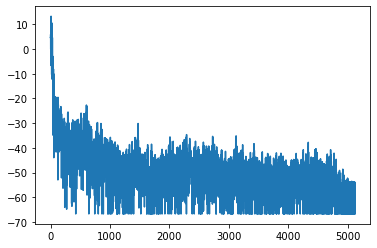

In [5]:
# 소리의 진폭을 데시벨 (dB) 단위로 변환해서 출력

dB = librosa.amplitude_to_db(np.abs(librosa.stft(wav[:2048])))

plt.plot(dB.flatten())

#####  mel specstrum 표시하기

In [6]:
# sr/2 : 주파수 
# sr/2 /n_mels: 세로축의 눈금 수 (멜 스펙트럼의 수)
S = librosa.feature.melspectrogram(wav,sr=sr,n_mels=128)
print("Mel Spectrum shape : {}".format(np.shape(S)))

Mel Spectrum shape : (128, 132)


C:\Users\SMT051\anaconda3\envs\deep\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\SMT051\anaconda3\envs\deep\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


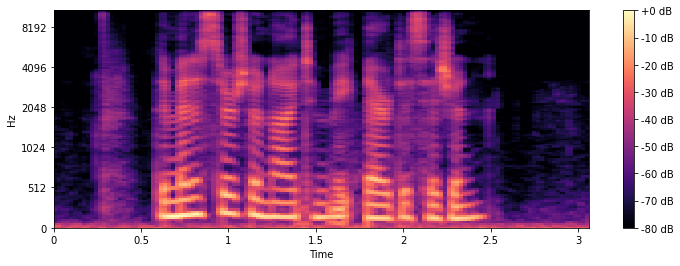

In [7]:
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr,x_axis="time",y_axis="mel")
plt.colorbar(format="%+02.0f dB")

##### 아기 울음소리 분류하기

In [8]:
import os

#CNN 사용하지 않고 신경망에 직접 넣어서 학습
X_train = []
X_test = []

# MFCC를 CNN 층에 넣어서 학습
train_mfcc = []
test_mfcc = []

y_train = []
y_test = []


In [9]:
pad1d = lambda a, i : a[0:i] if a.shape[0] > i else \
        np.hstack((a, np.zeros(i - a.shape[0])))

pad2d = lambda a, i : a[:,0:i] if a.shape[1] > i else \
        np.hstack((a, np.zeros(s.shape[0],i - a.shape[1])))

In [ ]:
TRAIN_DATA = "./baby_sound/train/"

# 울음소리 파일을 하나씩 읽어옴
for fname in os.listdir(TRAIN_DATA) :
    # silence (6).wav -> silence 잘라냄
    label = fname.split(' ')[0]
    # 라벨 데이터를 저장
    y_train.append(label)
    
    # 울음소리 데이터에서 mfcc를 구해보자
    # 아기 울음 소리 데이터를 로드
    wav, sr = librosa.load(TRAIN_DATA + fname)
    
    # 음성데이터를 30000개만 샘플링
    x_pad = pad1d(wav, 30000)
    X_train.append(x_pad)
    
    # mfcc로 변환
    mfcc = librosa.feature.mfcc(wav)
    # mfcc 값을 같은 길이(40)로 잘라준다
    mfcc_pad = pad2d(mfcc, 40)
    
    train_mfcc.append(mfcc_pad)
    
TEST_DATA = "./baby_sound/test/"

# 울음소리 파일을 하나씩 읽어옴
for fname in os.listdir(TEST_DATA) :
    # silence (6).wav -> silence 잘라냄
    label = fname.split(' ')[0]
    # 라벨 데이터를 저장
    y_test.append(label)
    
    # 울음소리 데이터에서 mfcc를 구해보자
    # 아기 울음 소리 데이터를 로드
    wav, sr = librosa.load(TEST_DATA + fname)
    
    # 음성데이터를 30000개만 샘플링
    x_pad = pad1d(wav, 30000)
    X_test.append(x_pad)
    
    # mfcc로 변환
    mfcc = librosa.feature.mfcc(wav)
    # mfcc 값을 같은 길이(40)로 잘라준다
    mfcc_pad = pad2d(mfcc, 40)
    
    test_mfcc.append(mfcc_pad)

In [ ]:
import pandas as pd

# 학습 데이터로 사용하려면 list를 numpy 배열로 변환
X_train = np.vstack(X_train)
train_mfcc = np.array(train_mfcc)
y_train = pd.get_dummies(y_train)

X_test = np.vstack(X_test)
test_mfcc = np.array(test_mfcc)
y_test = pd.get_dummies(y_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape